# Main notebook

This notebook can be used to run the misinfo model with various parameters.


## Imports

In [1]:
from misinfo_model import *
from visualization import *
from agents import *
import time
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")


## Parameters

In [2]:
visualize = True
n_agents = 100
agent_ratio = {NormalUser.__name__: 0.99, Disinformer.__name__: 0.01}
n_edges = 3
media_literacy_intervention = (0.2, SelectAgentsBy.RANDOM)
# ranking_visibility_adjustment = -0.0
delete_threshold = 0.1
p_true_threshold_ranking = 0.2

max_run_length = 60

## Model run

In [3]:
model = MisinfoPy(n_agents=n_agents,
                  n_edges=n_edges,
                  agent_ratio=agent_ratio,
                  media_literacy_intervention=media_literacy_intervention,
                  delete_threshold = 0.1,
                  p_true_threshold_ranking = 0.2,
                  )

## Visualize initial belief distribution

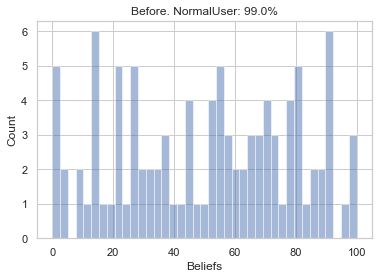

In [4]:
# Overview of the agents' belief distribution at the start
data = [agent.beliefs[Topic.VAX] for agent in model.schedule.agents]

bins = np.linspace(math.ceil(min(data)),
                   math.floor(max(data)),
                   40)  # fixed number of bins

plt.xlim([min(data) - 5, max(data) + 5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title(f'Before. NormalUser: {agent_ratio[NormalUser.__name__]*100}%')
plt.xlabel('Beliefs')
plt.ylabel('Count')

plt.show()

In [5]:
print(f"Starting")
start_time = time.time()
for i in range(max_run_length):
    model.step()
    if i % 10 == 0:
        print(f"step {i} done")

run_time = round(time.time() - start_time, 2)
print(f"With {max_run_length} steps, runtime is {run_time}")

Starting
step 0 done
7 tick-block
7 tick-block
7 tick-block
7 tick-block
7 tick-block
7 tick-block
7 tick-block
7 tick-block
7 tick-block
blocked forever at tick 9.0
blocked forever at tick 9.0
7 tick-block
blocked forever at tick 10.0
step 10 done
blocked forever at tick 11.0
blocked forever at tick 11.0
blocked forever at tick 12.0
blocked forever at tick 12.0
blocked forever at tick 13.0
blocked forever at tick 15.0
step 20 done
7 tick-block
7 tick-block
blocked forever at tick 29.0
step 30 done
step 40 done
step 50 done
With 60 steps, runtime is 2.4


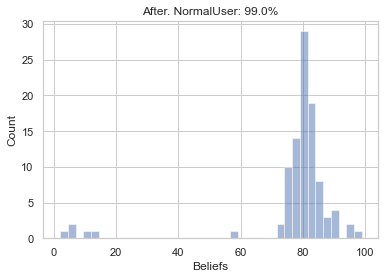

In [6]:
# Overview of the agents' belief distribution at the end
data = [agent.beliefs[Topic.VAX] for agent in model.schedule.agents]

bins = np.linspace(math.ceil(min(data)),
                   math.floor(max(data)),
                   40)  # fixed number of bins

plt.xlim([min(data) - 5, max(data) + 5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title(f'After. NormalUser: {agent_ratio[NormalUser.__name__]*100}%')
plt.xlabel('Beliefs')
plt.ylabel('Count')

plt.show()